# 4. Data preprocessing

## 4.1 Loading libraries

In [10]:
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler

In [11]:
# reading .csv files

train_data = pd.read_csv('train_bank.csv')
test_data = pd.read_csv('test.csv')
orignal_data = pd.read_csv('Churn_Modelling.csv')


In [12]:
numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
target_variable = 'Exited'
categorical_variables = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

## 4.2 Initial Observations

In [11]:
orignal_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [12]:
train_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory,AgeGroup,BalanceCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Average,31-40,Low,3-5,181449.970000,0.0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Average,31-40,Low,0-2,49503.500000,1.0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Average,41-50,Low,10+,184866.690000,0.0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Below Average,31-40,Very High,3-5,0.567967,1.0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Good,31-40,Low,6-10,15068.830000,1.0


In [13]:
test_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreCategory,AgeGroup,BalanceCategory,TenureGroup,SalaryToBalanceRatio,CreditCard_ActiveMember
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,Below Average,19-30,Low,3-5,160976.750000,0.0
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,Average,41-50,Low,3-5,72549.270000,0.0
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,Average,31-40,Low,6-10,138882.090000,0.0
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,Average,31-40,Low,6-10,113931.570000,0.0
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,Good,31-40,Very High,10+,1.149808,0.0


## 4.3 Feature Engineering

In [13]:
def perform_feature_engineering(df):
    
    #Credit Score category
    bins = [0, 500, 600, 700, 800, 850]
    labels = ['Poor', 'Below Average', 'Average', 'Good', 'Excellent']
    df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)
    
    # Age Group
    bins = [0, 18, 30, 40, 50, 60, 100]
    labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
    df['AgeGroup'] = pd.cut(df['Age'], bins= bins, labels=labels, right=False)
    
    # Balance Category
    bins = [-np.inf, 0, 10000, 50000, 100000, np.inf]
    labels = ['Negative', 'Low', 'Moderate', 'High', 'Very High']
    df['BalanceCategory'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)
    
    # Tenure Group
    bins = [0, 2, 5, 10, np.inf]
    labels = ['0-2', '3-5', '6-10', '10+']
    df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)
    
    # Salary to Balance Ratio
    df['SalaryToBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)  # Adding 1 to avoid division by zero

    # Credit Card and Active Member Interaction
    df['CreditCard_ActiveMember'] = df['HasCrCard'] * df['IsActiveMember']
    
    return df

# Apply the function to training_data
train_data = perform_feature_engineering(train_data)

# Apply the function to test_data
test_data = perform_feature_engineering(test_data)

In [14]:
columns_to_drop = ['CustomerId', 'Surname']
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace= True)
orignal_data.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

## 4.4 Outlier detection

In [15]:
columns_to_check = numerical_variables

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in columns_to_check:
    train_data = remove_outliers_iqr(train_data, column)

In [16]:
y = train_data['Exited']

## 4.5 Transformation of Distributions

In [17]:
# For TRAIN
# Itentify the features with skewness greater than 0.75
# Get the index of data to be transformed
skewed_features = train_data[numerical_variables].skew()[train_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75): ")
display(skewed_features)

# Apply log1p transformation to skewed features
train_data[skewed_features] = np.log1p(train_data[skewed_features])

Features to be transformed (skewness > 0.75): 


array([], dtype=object)

In [18]:
# For TEST
# Identify features with skewness greater than 0.75
# Get the index of data to be transformed
skewed_features = test_data[numerical_variables].skew()[test_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

# Apply log1p transformation to skewed features
test_data[skewed_features] = np.log1p(test_data[skewed_features])

Features to be transformed (skewness > 0.75):


array(['Age'], dtype=object)

## 4.6 Feature Encoding

In [19]:
# selecting specific columns for encoding
columns_to_encode = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 
                     'IsActiveMember','AgeGroup', 'BalanceCategory', 
                     'CreditScoreCategory', 'TenureGroup','CreditCard_ActiveMember']

train_data_to_encode = train_data[columns_to_encode]
test_data_to_encode = test_data[columns_to_encode]

# Dropping selected columns for scaling
train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

In [20]:
# Use pandas get_dummies to one-hot encode 'Geography' and 'Gender' in train_data
train_data_encoded = pd.get_dummies(
    train_data_to_encode, columns=['Geography', 'Gender','NumOfProducts', 
                                   'HasCrCard','IsActiveMember','AgeGroup', 
                                   'BalanceCategory', 'CreditScoreCategory', 
                                   'TenureGroup','CreditCard_ActiveMember'], drop_first=True)

# Use pandas get_dummies to one-hot encode 'Geography' and 'Gender' in test_data
test_data_encoded = pd.get_dummies(
    test_data_to_encode, columns=['Geography', 'Gender','NumOfProducts', 
                                  'HasCrCard','IsActiveMember','AgeGroup', 
                                  'BalanceCategory', 'CreditScoreCategory', 
                                  'TenureGroup','CreditCard_ActiveMember'], drop_first=True)

In [24]:
train_data_encoded.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,BalanceCategory_High,BalanceCategory_Very High,CreditScoreCategory_Below Average,CreditScoreCategory_Average,CreditScoreCategory_Good,CreditScoreCategory_Excellent,TenureGroup_3-5,TenureGroup_6-10,TenureGroup_10+,CreditCard_ActiveMember_1.0
0,False,False,True,True,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,False,False,True,True,False,False,True,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,False,False,True,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,True,False,False,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True
4,False,True,True,True,False,False,True,True,False,True,...,False,False,False,False,True,False,False,True,False,True


In [25]:
test_data_encoded.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,BalanceCategory_High,BalanceCategory_Very High,CreditScoreCategory_Below Average,CreditScoreCategory_Average,CreditScoreCategory_Good,CreditScoreCategory_Excellent,TenureGroup_3-5,TenureGroup_6-10,TenureGroup_10+,CreditCard_ActiveMember_1.0
0,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
3,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
4,True,False,True,False,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False


## 4.7 Feature Scaling

In [21]:
robust_scaler = RobustScaler()

# Fit the scaler on the training data
robust_scaler.fit(train_data_to_scale.drop(['Exited'], axis=1))

# Scale the training data
scaled_data_train = robust_scaler.transform(train_data_to_scale.drop(['Exited'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['Exited'],axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = robust_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(test_data_to_scale, columns=test_data_to_scale.columns)

# Add the 'Exited' column back to the scaled training data
scaled_train_df['Exited'] = train_data['Exited'].values

In [22]:
scaled_train_df.head()

,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,SalaryToBalanceRatio,Exited
0,-1.000121,0.161905,-0.375,-0.50,0.000000,0.823447,1.065655,0
1,-1.000109,-0.228571,-0.375,-1.00,0.000000,-0.861793,0.013858,0
2,-1.000097,0.257143,0.500,1.25,0.000000,0.867086,1.092891,0
3,-1.000085,-0.666667,-0.250,-0.75,1.261481,-0.414035,-0.380749,0
4,-1.000073,0.619048,-0.375,0.00,0.000000,-1.301598,-0.260634,0


In [33]:
scaled_test_df.head()

,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,SalaryToBalanceRatio
0,165034,586,3.178054,2,0.00,160976.75,160976.750000
1,165035,683,3.850148,2,0.00,72549.27,72549.270000
2,165036,656,3.555348,7,0.00,138882.09,138882.090000
3,165037,681,3.610918,8,0.00,113931.57,113931.570000
4,165038,752,3.663562,10,121263.62,139431.00,1.149808


In [23]:
# concatenate train datasets
train_data_combined = pd.concat([train_data_encoded, train_data_to_scale], axis=1)

# concatenate test datasets
test_data_combined = pd.concat([test_data_encoded, test_data_to_scale], axis=1)

In [24]:
train_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,TenureGroup_10+,CreditCard_ActiveMember_1.0,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,SalaryToBalanceRatio
0,False,False,True,True,False,False,True,False,False,True,...,False,False,0,668,33.0,3,0.00,181449.97,0,181449.970000
1,False,False,True,True,False,False,True,True,False,True,...,False,True,1,627,33.0,1,0.00,49503.50,0,49503.500000
2,False,False,True,True,False,False,True,False,False,False,...,True,False,2,678,40.0,10,0.00,184866.69,0,184866.690000
3,False,False,True,False,False,False,True,True,False,True,...,False,True,3,581,34.0,2,148882.54,84560.88,0,0.567967
4,False,True,True,True,False,False,True,True,False,True,...,False,True,4,716,33.0,5,0.00,15068.83,0,15068.830000


In [37]:
test_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,TenureGroup_6-10,TenureGroup_10+,CreditCard_ActiveMember_1.0,id,CreditScore,Age,Tenure,Balance,EstimatedSalary,SalaryToBalanceRatio
0,False,False,False,True,False,False,False,True,True,False,...,False,False,False,165034,586,3.178054,2,0.00,160976.75,160976.750000
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,165035,683,3.850148,2,0.00,72549.27,72549.270000
2,False,False,False,True,False,False,True,False,False,True,...,True,False,False,165036,656,3.555348,7,0.00,138882.09,138882.090000
3,False,False,True,False,False,False,True,False,False,True,...,True,False,False,165037,681,3.610918,8,0.00,113931.57,113931.570000
4,True,False,True,False,False,False,True,False,False,True,...,False,True,False,165038,752,3.663562,10,121263.62,139431.00,1.149808


## 4.8 Dropping highly correlated features

In [25]:
# add the 'Exited' column back to the scaled training data

train_data_combined['Exited'] = train_data['Exited'].values

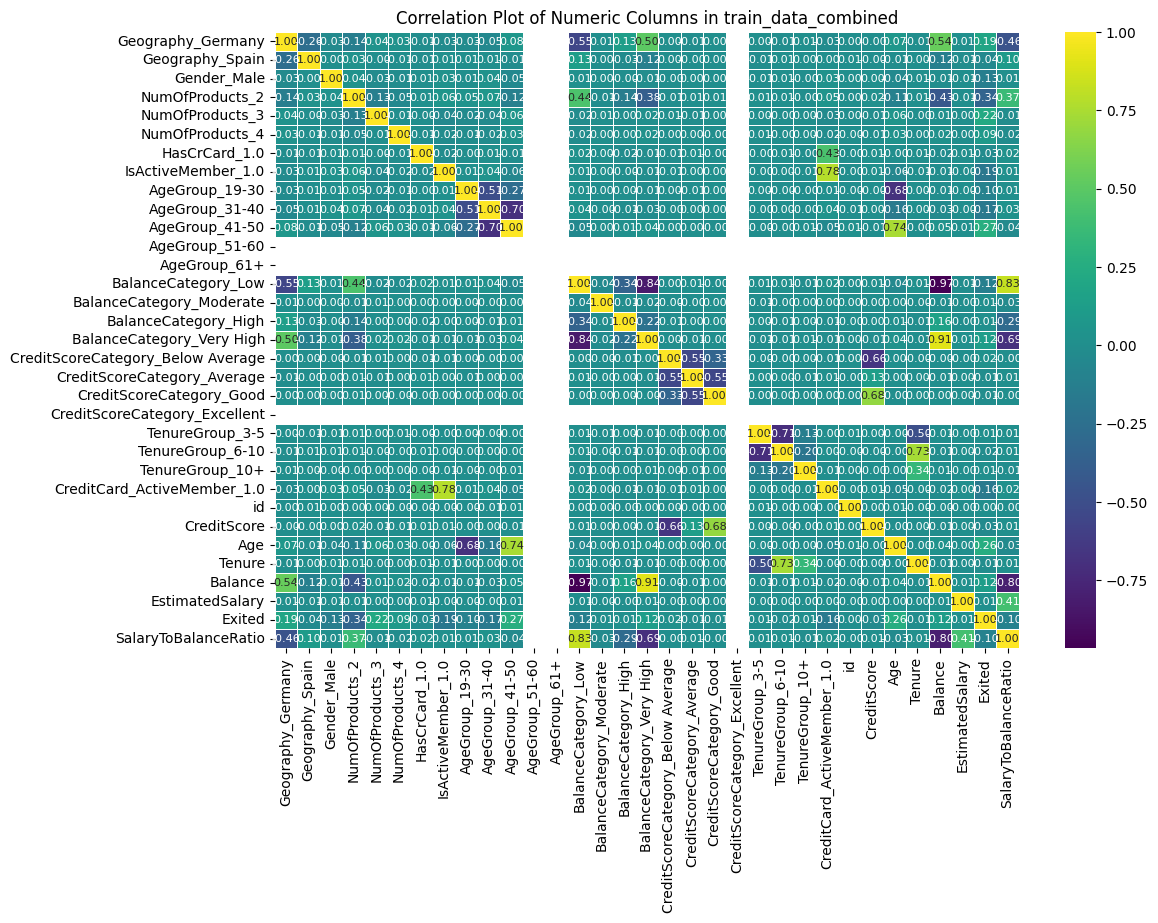

In [26]:
# select numeric columns
numeric_cols = train_data_combined.select_dtypes(include=['number', 'bool'])

# calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# create a heatmap using Seaborn with smaller font size for annotations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap= 'viridis', 
            fmt= '.2f', linewidths=0.5, annot_kws= {'size':8})
plt.title('Correlation Plot of Numeric Columns in train_data_combined')
plt.show()

In [24]:
train_data_combined.drop(['CreditScore', 'Age', 'Tenure', 'Balance',
                         'EstimatedSalary'],
                        axis= 1, inplace= True)

In [26]:
test_data_combined.drop(['CreditScore', 'Age', 'Tenure', 'Balance',
                        'EstimatedSalary'], axis= 1, inplace=True)

In [27]:
train_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,CreditScoreCategory_Average,CreditScoreCategory_Good,CreditScoreCategory_Excellent,TenureGroup_3-5,TenureGroup_6-10,TenureGroup_10+,CreditCard_ActiveMember_1.0,id,Exited,SalaryToBalanceRatio
0,False,False,True,True,False,False,True,False,False,True,...,True,False,False,True,False,False,False,0,0,181449.970000
1,False,False,True,True,False,False,True,True,False,True,...,True,False,False,False,False,False,True,1,0,49503.500000
2,False,False,True,True,False,False,True,False,False,False,...,True,False,False,False,False,True,False,2,0,184866.690000
3,False,False,True,False,False,False,True,True,False,True,...,False,False,False,True,False,False,True,3,0,0.567967
4,False,True,True,True,False,False,True,True,False,True,...,False,True,False,False,True,False,True,4,0,15068.830000


In [28]:
test_data_combined.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1.0,IsActiveMember_1.0,AgeGroup_19-30,AgeGroup_31-40,...,CreditScoreCategory_Below Average,CreditScoreCategory_Average,CreditScoreCategory_Good,CreditScoreCategory_Excellent,TenureGroup_3-5,TenureGroup_6-10,TenureGroup_10+,CreditCard_ActiveMember_1.0,id,SalaryToBalanceRatio
0,False,False,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,False,165034,160976.750000
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,165035,72549.270000
2,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,165036,138882.090000
3,False,False,True,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,165037,113931.570000
4,True,False,True,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,165038,1.149808


# 5. Model building and Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import optuna


# set the seed for reproducability
seed = 42

# initialize all classification models
log_reg = LogisticRegression(random_state = seed, max_iter = 1000000)
svc = SVC(random_state = seed, probability = True)
lda= LinearDiscriminantAnalysis()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
gauss = GaussianProcessClassifier(random_state = seed)
rf = RandomForestClassifier(random_state = seed)
et = ExtraTreesClassifier (random_state = seed)
xbg = XGBClassifier (random_state = seed)
lgb = LGBMClassifier (random_state = seed)
dart = LGBMClassifier (random_state = seed)
#cb = CatBoostClassifier (random_state = seed, verbose = 0)
gb = GradientBoostingClassifier (random_state = seed)
hgb = HistGradientBoostingClassifier (random_state = seed)


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X = train_data_combined.drop('Exited',axis=1)
y = train_data_combined['Exited']

# Function to display feature importance
def display_feature_importance(model, top_n=34,percentage=3, plot=False):
    # Fit the model
    model.fit(X, y)
    
    # Get feature importance
    feature_importance = model.feature_importances_
    
    feature_names = X.columns
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Calculate threshold based on percentage of the top feature importance
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']
    
    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
    
    if plot==True:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")
    
        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()
        
        print("Selected Features at threshold {}%; {}".format(percentage,selected_features))
    
    # Add 'Exited' to the list of selected features
    selected_features.append('Exited')
        
    return selected_features

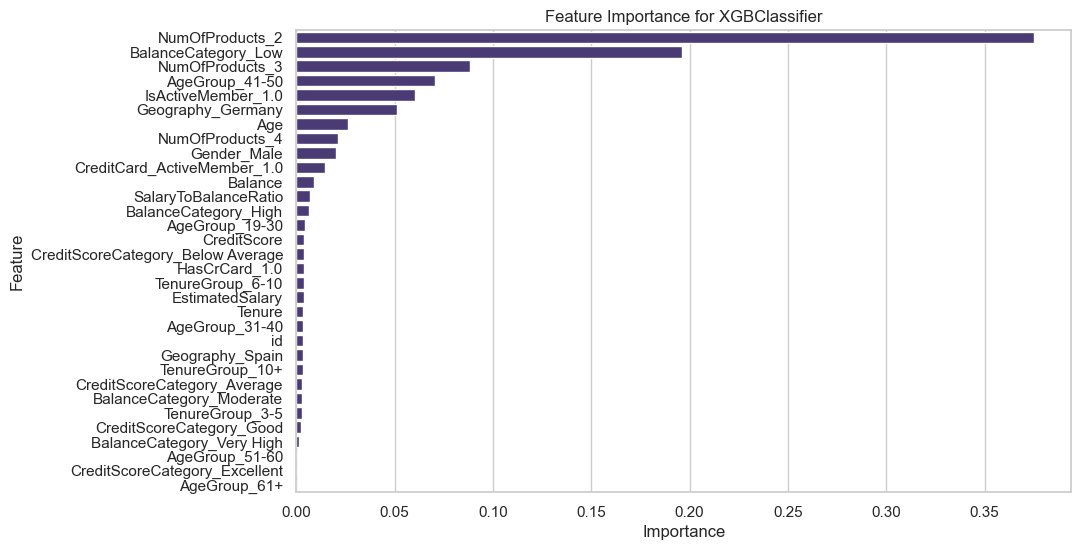

Selected Features at threshold 3%; ['NumOfProducts_2', 'BalanceCategory_Low', 'NumOfProducts_3', 'AgeGroup_41-50', 'IsActiveMember_1.0', 'Geography_Germany', 'Age', 'NumOfProducts_4', 'Gender_Male', 'CreditCard_ActiveMember_1.0']
[LightGBM] [Info] Number of positive: 21081, number of negative: 109109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1338
[LightGBM] [Info] Number of data points in the train set: 130190, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161925 -> initscore=-1.643975
[LightGBM] [Info] Start training from score -1.643975


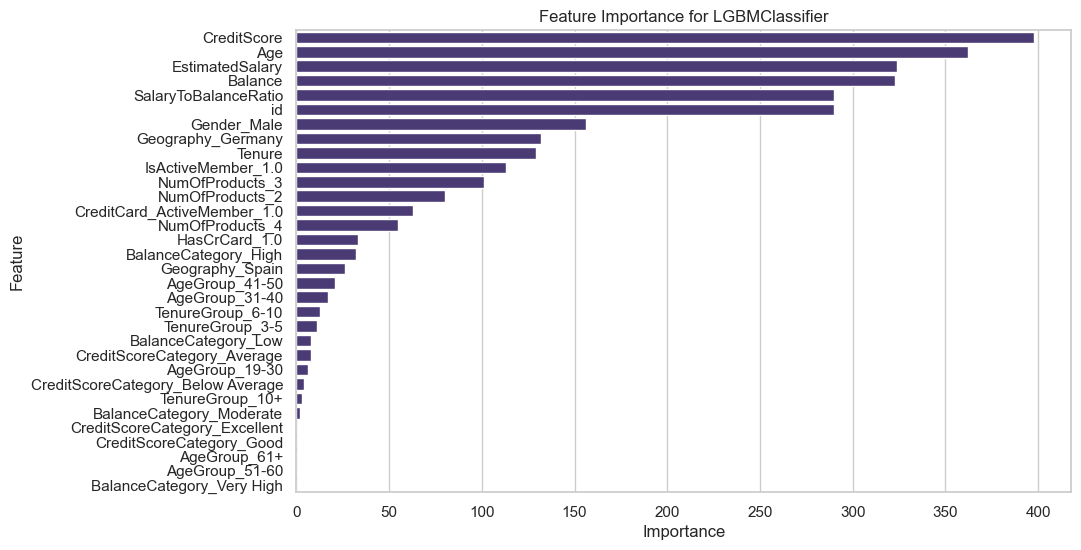

Selected Features at threshold 20%; ['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'SalaryToBalanceRatio', 'id', 'Gender_Male', 'Geography_Germany', 'Tenure', 'IsActiveMember_1.0', 'NumOfProducts_3', 'NumOfProducts_2']


In [50]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_selected_features = display_feature_importance(xgb_model, percentage=3, plot=True)

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_selected_features = display_feature_importance(lgb_model, percentage=20, plot=True)

## XGB Optuna Hypyterparameter Tuning

In [55]:
if submit == False:
    import optuna
    from xgboost import XGBClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score

    # Assuming 'X'  is the feature and 'y' is the target variable
    X = train_data_combined[xgb_selected_features].drop('Exited', axis= 1)
    y = train_data_combined['Exited']

    def objective(trial):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

    params = {
        'max_depth' : trial.suggest_int ('max_depth', 5, 10),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 1.0), 
        'n_estimators' : trial.suggest_int('n_estimators', 150, 1000), 
        'subsample' : trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.01, 1.),
        'random_state' : trial.suggest_categorical('random_state', [42]),
        'tree_method' : 'hist',  # use GPU for training
        'device' : 'cuda',
        'eval_metric' : 'auc'
        #'verbosity' : 0 # set it to 2 for more output
    }

    model = XGGClassifier(**params)

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

    study = optuna.create_study(direction= 'maximize')
    study.optimize (objective, n_trials=50)

    print('Number of finished trials: ', len(study.trials))
    print('ParamsL ')
    for key, value in trail.params.items():
        print(f'{key}:{value}')

SyntaxError: 'return' outside function (103712551.py, line 35)

### Suggested readings

1. [4 Machine learning techniques for outlier detection in Python](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
2. [Outlier detection methods in ML](https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8)
3. [How to Detect Outliers in Machine Learning](https://www.geeksforgeeks.org/machine-learning-outlier/)